In [ ]:
# w tym pliku jest kod do zrobienia tych pierwszych wykresów (np. tych w ogóle bez podziału na dzień, na godziny, no na nic)
# do tego mamy przebiegi dobowe, które są poprawione i działają bardzo dobrze 

In [2]:
import pandas as pd

tab_cal1=pd.read_csv("Bio-Sid-NPK1_20231201_planteye.csv", sep=",")
tab_cal2=pd.read_csv("Bio_Sid_NPK6_20231201_planteye.csv", sep=",")

tab_cal=pd.concat([tab_cal1, tab_cal2])


days=[]
time=[]
for i in range(len(tab_cal)): 
    days.append(tab_cal.iloc[i,4].split(" ")[0])
    time.append(tab_cal.iloc[i,4].split(" ")[1])
dayslist=list(set(days))
dayslist.sort()

dayind=list(range(1, len(dayslist) + 1))
dind = dict(zip(dayslist, dayind))
dayscoded=[]
for i in range(len(days)):
    dayscoded.append(dind[days[i]])
tab_cal.insert(5,"Day",dayscoded)
tab_cal.insert(6,"Time", time)


rozkodowanie = {'1:10:1':'Bio_NPK1_6', '1:10:2':'NPK3_3', '1:10:3':'Sid_3', '1:1:1':'Bio_NPK1_4', '1:1:2':'Bio_6', '1:1:3':'Bio_NPK1_5', 
                '1:2:1':'Sid_NPK3_4', '1:2:2':'NPK1_5', '1:2:3':'Sid_2', '1:3:1':'Bio_NPK2_4','1:3:2':'con_2', '1:3:3':'NPK2_6', 
                '1:4:1':'Bio_NPK1_3', '1:4:2':'NPK3_4', '1:4:3':'Sid_NPK3_3', '1:5:1':'NPK1_1', '1:5:2':'con_4', '1:5:3':'NPK2_4', 
                '1:6:1':'Bio_NPK3_2', '1:6:2':'NPK2_2', '1:6:3':'Bio_NPK2_5','1:7:1':'Bio_NPK1_2', '1:7:2':'Bio_2', '1:7:3':'NPK1_6', 
                '1:8:1':'Sid_NPK3_6', '1:8:2':'Bio_NPK3_1', '1:8:3':'Bio_NPK2_6', '1:9:1':'Bio_3', '1:9:2':'Sid_NPK3_5', '1:9:3':'Bio_1', 
                '6:10:1':'con_6', '6:10:2':'Sid_6', '6:10:3':'Bio_NPK2_2', '6:1:1':'NPK1_4','6:1:2':'Sid_NPK3_2', '6:1:3':'NPK1_3', 
                '6:2:1':'Bio_NPK3_5', '6:2:2':'Bio_NPK2_1', '6:2:3':'NPK3_6', '6:3:1':'NPK3_5', '6:3:2':'NPK1_2', '6:3:3':'Bio_NPK3_3', 
                '6:4:1':'NPK2_1', '6:4:2':'con_1', '6:4:3':'NPK2_3', '6:5:1':'Sid_4', '6:5:2':'Bio_NPK3_6', '6:5:3':'Sid_5', '6:6:1':'Bio_4', 
                '6:6:2':'NPK3_2', '6:6:3':'Bio_5', '6:7:1':'Bio_NPK1_1', '6:7:2':'Sid_1', '6:7:3':'NPK2_5', '6:8:1':'Sid_NPK3_1', 
                '6:8:2':'con_5', '6:8:3':'NPK3_1', '6:9:1':'Bio_NPK2_3', '6:9:2':'Bio_NPK3_4', '6:9:3':'con_3'}

tab_cal.insert(0, 'kod', tab_cal['unit'].map(rozkodowanie))
Day20=tab_cal[tab_cal.Day == 20]
#df dla dnia 20 i wariantu NPK2, która posłuży do wykresu dla całego przebiegu greenness dla NPK2
NPK2Day20=tab_cal[(tab_cal.Day==20)&(tab_cal.treatment == "NPK2")] 



In [79]:
#dodatkowy df dla jednej rośliny wybranej z roślin wariantu NPK2

pNPK2d20=NPK2Day20[(NPK2Day20.unit=="1:3:3")] 


In [3]:
#df dla jednej rośliny j.w. ale tylko z uwzględnieniem kolumn, które chcemy 

par=['unit', 'Day', 'Time', 'Digital biomass [mm³]']
pPar=tab_cal[par]
pPar = pPar[pPar['unit'] == "1:3:3"]

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pPar['Day'], pPar['NDVI average'], s=0.01)
plt.ylabel('średnie NDVI')
plt.title('Wykres przebiegu parametru średniego NDVI w czasie trwania całego eksperymentu')
plt.xticks(pPar['Day'][::30])
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.scatter(pPar['Time'], 
           pPar['Digital biomass [mm³]'], 
           s=0.1,
           color= 'darkgreen',
           marker= '^' )
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(27, 900)
plt.show()

In [ ]:
#wykres przebiegu greenness dla jednej rośliny, w ciągu całego eksperymentu, tutaj cały czas mamy sytuację bez żadnego uśredninia

par2=['unit', 'Day', 'Time', 'greenness average']
pPar2=tab_cal[par2]
pPar2 = pPar2[pPar2['unit'] == "1:3:3"]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(25, 900)
ax.set_ylim(0, 0.5)
ax.set_xlabel('Dzień')
ax.set_ylabel('greenness average')


In [ ]:
#wykres przebiegu greenness dla jednej rośliny, w ciągu całego eksperymentu, tutaj cały czas mamy sytuację bez żadnego uśredninia
#skopiowane to co jest wyżej, zrobione dla innej rośliny z wariantu control


pPar3 = pPar2[pPar2['unit'] == "1:3:2"]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= '#3503fc',
           marker= '^' )
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(25, 900)
ax.set_ylim(0, 0.5)
ax.set_xlabel('Dzień')
ax.set_ylabel('greenness average')


In [ ]:
# też wykres przebiegu dla całego eksperymentu dla greenness ale tym razem nie scatter tylko liniowy
par2=['unit', 'Day', 'Time', 'greenness average']
pPar2=tab_cal[par2]
pPar2 = pPar2[pPar2['unit'] == "1:3:3"]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.01))
ax = fig.add_subplot(111)
ax.plot(pPar2['Time'], 
           pPar2['greenness average'], 
           color= 'darkgreen',
           marker= '^',
           markersize=1,
           linestyle='-',
           linewidth=1)
ax.set_xticks(range(1, 894, 22))
ax.set_xticklabels(range(1, 42, 1), rotation=45)
ax.set_xlim(27, 900)

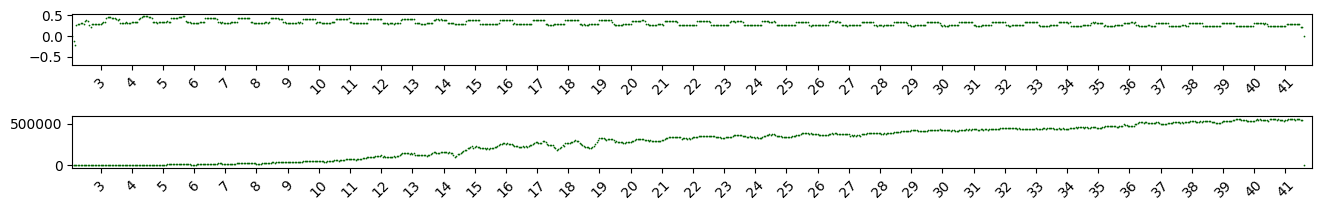

In [8]:
#jedna figura dla dwóch parametrów (greenness i db)

import matplotlib.pyplot as plt

fig2 = plt.figure(figsize=plt.figaspect(0.01))
ax21 = fig2.add_subplot(211)
ax21.scatter(pPar2['Time'], 
           pPar2['greenness average'], 
           s=0.1,
           color= 'darkgreen',
           marker= '^' )
ax21.set_xticks(range(1, 894, 22))
ax21.set_xticklabels(range(1, 42, 1), rotation=45)
ax21.set_xlim(25, 900)

ax22 = fig2.add_subplot(212)
ax22.scatter(pPar['Time'], 
           pPar['Digital biomass [mm³]'], 
           s=0.1,
           color= 'darkgreen',
           marker= '^' )
ax22.set_xticks(range(1, 894, 22))
ax22.set_xticklabels(range(1, 42, 1), rotation=45)
ax22.set_xlim(25, 900)
 ## limity na osi y
fig2.subplots_adjust(hspace=1)
plt.show()

In [ ]:
# tu był jakiś attempt dodania numerów roślin, ale chyba stwierdziłam że to bez sensu i rzeczywiście było bez sensu bo nijak się to ma do 
#rzeczywistych numerów roślin
# ALE chyba potem dalej się coś nie zgadza z liczeniem kolumn jeśli się nie wklika tego ale to napiszę jakiś disclaimer
#DISCLAIMER: rzeczywiście kolejna komórka nie działa, jeśli nie ma tej kolumny dodanej, więc albo zmieniamy iloc w kolejnej komórce na 3 (z tą
#komórką tam powinno być 4), albo puszczamy tą komórkę
plantno=[]
for i in range(len(tab_cal)): 
    plantno.append(tab_cal.iloc[i,0])
    
plantnolist=list(set(plantno))
plantnolist.sort()

plantnoind=list(range(1, len(plantnolist) + 1))
pnoind = dict(zip(plantnolist, plantnoind))

plantnocoded=[]
for i in range(len(plantno)):
    plantnocoded.append(pnoind[plantno[i]])
tab_cal.insert(1,"Plant number",plantnocoded)


In [5]:
#best idea ever czyli zrobienie listy wszystkich wariantów nawożenia, spoko, bo przyda mi się to do sałaty
#tutaj po i musi być 3 jeżeli nie mamy numerów roślin i 4 jeśli mamy numery roślin
## znowu pewnie trzeba jakoś to zmienić bo dodałam rozkodowanie ale nie chce mi się teraz sprawdzać
warunki=[]
for i in range(len(tab_cal)): 
    warunki.append(tab_cal.iloc[i,4])

warunkilista=list(set(warunki))


In [ ]:
#tworzenie słownika z tabelami, które opierają się na wariantach, które są w liście wariantów, czyli dzielenie całej tabelki na warianty nawożenia

tabele_warunki={}
for value in warunkilista:
    tabele_warunki[value]=Day20[Day20['treatment'] == value]

for value, df in tabele_warunki.items():
    print(f"Stosowane nawożenie: '{value}':")
    print(df.head())
    print('\n')


In [ ]:
#tutaj robimy wybór jakie chcemy mieć kolumny w tych wszystkich naszych tabelach w słowniku, tbh lepiej by to było zrobić to na głównej 
#tabeli niż tak sobie komplikować życie, ale to błędy młodości 

kol=['kod', 'unit', 'treatment', 'Day', 'Time', 'Digital biomass [mm³]', 'greenness average', 'Height [mm]', 'Leaf angle [°]', 
     'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 'NDVI average', 'NPCI average', 'PSRI average']

tab_war_kol = {key: df[kol] for key, df in tabele_warunki.items()}

for value, df in tab_war_kol.items():
    print(f"Stosowane nawożenie: '{value}':")
    print(df.head())
    print('\n')



In [ ]:
#robimy sobie jakąś dodatkową tablkę, gdzie jest tylko wariant control, pewnie się do niczego nie przyda XD

control = tab_war_kol['control']
print(control.head())

In [10]:
# tu pobieram sobie unikalne unity, ale nie wiem do końca po co, once again, pewnie po nic

unique_unit = control['unit'].unique()

col_unit = {}

for value in unique_unit:
    col_unit[value] = control[control['unit'] == value]


In [11]:
#tu mi się drukują unikalne unity dla wszystkich wariantów, wiec jest ich pewnie 60
#update: tak, jest ich 60 więc nawet się zgadza i tak wydaje mi się, że do niczego mi się to nie przyda 
## omg actually, jakbym potem zrobiła listę w tej samej kolejności oznaczeń tych numerycznych to actually mogłoby mieć sens

unique_unit_test = set()

for key, df in tab_war_kol.items():
    unique_unit_test.update(df['unit'].unique())

unique_unit_test_list = list(unique_unit_test)

print(unique_unit_test_list)



['6:5:1', '6:6:1', '6:4:1', '6:7:3', '1:2:2', '6:10:3', '1:2:1', '1:9:2', '1:7:2', '6:3:3', '6:8:1', '1:10:2', '6:7:2', '1:7:1', '6:9:1', '1:8:2', '6:3:1', '1:5:3', '6:3:2', '1:5:2', '6:8:2', '1:3:2', '6:1:3', '6:6:2', '1:2:3', '6:8:3', '6:5:2', '1:6:3', '6:4:3', '1:10:1', '1:1:3', '1:1:2', '6:1:1', '1:3:3', '6:2:2', '6:5:3', '1:1:1', '1:10:3', '6:1:2', '6:2:1', '6:9:3', '1:6:1', '6:7:1', '1:7:3', '1:9:3', '1:8:1', '1:4:2', '6:2:3', '1:4:3', '6:9:2', '6:6:3', '1:5:1', '6:10:1', '1:8:3', '1:3:1', '6:10:2', '1:9:1', '1:4:1', '6:4:2', '1:6:2']


In [ ]:
# tutaj drukuje sobie wszystkie wartości dla danego unitu dla danego wariantu, opiera się to na tym, że biorę klucz, z tego słownika wariantów
# i potem dodaje do tego filtrowanie po unikalnym unit 
# printuje się tylko 5 pierwszych wartości ale to dlatego że mam zaznaczone żeby to był tylko head 
# tutaj to wszystko jest dla jednego dnia (20)

war_unit_kol={}

for key, df in tab_war_kol.items():
    for value in df['kod'].unique():
        new_key = f"{value}"
        war_unit_kol[new_key] = df[df['kod'] == value]

for value, df in war_unit_kol.items():
    print(f"'{value}':")
    print(df.head())
    print('\n')

In [ ]:
#wykres dla jednego dnia (20), tylko digital biomass, dla jakich 6 roślin wiec podjerzewam że jest to jeden wariant
#tak, to jest wszystko control
##tu by się przydało zrobić rotacje ticków ale nie umiem sama - jednak umiałam sama nevermind 

import matplotlib.pyplot as plt 

fig44, axs44 = plt.subplots(1, len(col_unit), figsize=(4*len(col_unit), 3 ))

for i, (key, df) in enumerate(col_unit.items()):
    axs44[i].scatter(df['Time'], df['Digital biomass [mm³]'])
    axs44[i].set_title(f'{key}')
    axs44[i].set_xlabel('Time')
    axs44[i].set_ylabel('Digital Biomass [mm³]')
    axs44[i].set_xticks(range(0, len(df['Time']),2))
    axs44[i].set_xticklabels(df['Time'][::2],rotation = 80) 
    
    

plt.tight_layout()
plt.show()

In [ ]:
#wszystkie 60 wykresów, digital biomass dla każdego wariantu, dla każdej rośliny 

import matplotlib.pyplot as plt 

fig444, axs444 = plt.subplots(10, 6, figsize=(4*6, 3*10))

overall_min = float('inf')
overall_max = float('-inf')

for key, df in war_unit_kol.items():
    current_min = df['Digital biomass [mm³]'].min()  # Find the minimum value in the current DataFrame
    current_max = df['Digital biomass [mm³]'].max()  # Find the maximum value in the current DataFrame
    overall_min = min(overall_min, current_min)
    overall_max = max(overall_max, current_max)


for i, (key, df) in enumerate(war_unit_kol.items()):
    row = i // 6  #  row index
    col = i % 6   #  column index

    axs444[row, col].scatter(df['Time'], df['Digital biomass [mm³]'], color='#3503fc')
    axs444[row, col].set_ylim(overall_min, overall_max)
    axs444[row, col].set_title( f'{key}')
    axs444[row, col].set_xlabel('Time')
    axs444[row, col].set_ylabel('Digital Biomass [mm³]')
    axs444[row, col].set_xticks(range(0, len(df['Time']),2))
    axs444[row, col].set_xticklabels(df['Time'][::2], rotation=80)

    

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt 

fig445, axs445 = plt.subplots(10, 6, figsize=(4*6, 3*10))

overall_min = float('inf')
overall_max = float('-inf')

for key, df in war_unit_kol.items():
    current_min = df['greenness average'].min()  # Find the minimum value in the current DataFrame
    current_max = df['greenness average'].max()  # Find the maximum value in the current DataFrame
    overall_min = min(overall_min, current_min)
    overall_max = max(overall_max, current_max)

for i, (key, df) in enumerate(war_unit_kol.items()):
    row = i // 6  # row index
    col = i % 6   # column index

    axs445[row, col].scatter(df['Time'], df['greenness average'], color='#3503fc')
    axs445[row, col].set_ylim(overall_min, overall_max)
    axs445[row, col].set_title(f'{key}')
    axs445[row, col].set_xlabel('Time')
    axs445[row, col].set_ylabel('greenness average')
    axs445[row, col].set_xticks(range(0, len(df['Time']),2))
    axs445[row, col].set_xticklabels(df['Time'][::2], rotation=80)
    axs445[row, col].axvspan(0, 4.5, color='green', alpha=0.2)
    

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt 

fig446, axs446 = plt.subplots(10, 6, figsize=(4*6, 3*10))


for i, (key, df) in enumerate(war_unit_kol.items()):
    row = i // 6  # row index
    col = i % 6   # column index

    
    axs446[row, col].scatter(df['Time'], df['PSRI average'])
    axs446[row, col].set_title(f'PSRI average over Time - {key}')
    axs446[row, col].set_xlabel('Time')
    axs446[row, col].set_ylabel('PSRI average')
    

plt.tight_layout()
plt.show()

In [ ]:
column_names = list(tab_cal.columns)
print(column_names)

In [ ]:
##zamienić godzinę na paramter liczbowy 

In [15]:
##to jest zrobione tak, że trzeba zmieniać treatment i trzeba zmieniać parametr; więc już zasadniczo nie jest to potrzebne
## filtr dla danego treatment

pA1= tab_cal[kol]

pA1fcontrol=pA1[(pA1.treatment== 'Sid')]

## zrobić tabelę dla każdego dnia od 5 dnia 

pA1fcontrol_daydict={}

for i in dayind[4:40]:
    pA1fcontrol_daydict[i] = pA1fcontrol[pA1fcontrol['Day'] == i]

for key, df in pA1fcontrol_daydict.items():
    unique_roślina = df['unit'].unique()

średnie_roślin_w_dniu=[]

for key, df in pA1fcontrol_daydict.items():
    for unit_value in unique_roślina:
        # filter based on the condition (unit == unit_value)
        roślina = df[df['unit'] == unit_value].head(6)
        
        # mean for the specific column
        mean_roślina = roślina['Digital biomass [mm³]'].mean()

        sd_roślina = roślina['Digital biomass [mm³]'].std()

        średnie_roślin_w_dniu.append({'Dzień': key, 'Roślina': roślina.iloc[0]['unit'],  'Średnia': mean_roślina, 
                                      'SD':sd_roślina})
        

        pŚrednie_roślin_w_dniu = pd.DataFrame(średnie_roślin_w_dniu)


pŚrednie_dla_dnia = pŚrednie_roślin_w_dniu.groupby('Dzień')['Średnia'].mean()
pSD_dla_dnia = pŚrednie_roślin_w_dniu.groupby('Dzień')['SD'].std()

dzień_roślina_SD = pd.concat([pŚrednie_dla_dnia,pSD_dla_dnia], axis=1)

## wziąć 1-6 dla danej rośliny w tabeli i zrobić z tego średnią
## zrobić tabelę przedstawiającą nazwę rośliny i średnią z jej 6 pierwszych pkt + SD


In [16]:
##with all due respect do mnie z przeszłości, this doesn't work i jest zbyt skomplikowane, więc adios 

# tu jest już początek dla tego, że robię słownik treatment, spoko, ale chyba nie mam ograniczenia, żeby wykluczyć dzień 41 (ostatni)
#kolejnym błedem jest tu to z cumcount, dlatego że dałam grupowanie tylko po dniu, a jest 60 roślin, które mają ten sam dzień 
#albo trzeba to zmienić na grupowanie po unit i dzień, albo zostawić bo dalej już sobie z tym poradziłam, podejrzewam, że tu do końca pliku
#może być z tym problem
## filtr dla danego treatment




pA2= tab_cal[kol]

pA2 = pA2.loc[(pA2["Day"] > 4)]

pA2.insert(loc=2, column="godz", value=pA2.groupby('Day').cumcount()+1)



In [ ]:
#robię słownik dla warunków 
#problemem jest to, że dni 40 i 41 nie są najlepsze, nie mają całego swojego przebiegu

pA2treatment_daydict={}

for i in warunkilista:
    pA2treatment_daydict[i] = pA2[pA2['treatment'] == i]

day_dict = {}

for unit, df in pA2treatment_daydict.items():
    print(f"Unit: {unit}")
    print(df)
    


In [24]:
#problemem tego kodu jest to, że niby ma iterować przez wszystkie dni, ale zaczyna od 9 

for key, df in pA2treatment_daydict.items():
 
    days = df['Day'].unique()
    
    for day in days[4:]:
        day = df[(df['Day'] == day)].copy()            
        day_dict[f"{day}__{key}"] = day


for i, df in day_dict.items():
    print(f'{i}')
    print(df)

for key, df in pA2treatment_daydict.items():
    unique_roślina = df['unit'].unique()

średnie_roślin_w_dniu =[]
for key, df in day_dict.items():
    for unit_value in unique_roślina:
        # filter based on the condition (unit == unit_value)
        roślina = df[df['unit'] == unit_value].head(6)
        
        # mean for the specific column
        mean_roślina = roślina.iloc[:, 6:].mean()

        # Create a new DataFrame with mean values
        mean_table = pd.DataFrame({'Dzień': key, 'Roślina': roślina.iloc[1]['unit']})

        # Add mean values as columns
        mean_table = pd.concat([mean_table, mean_roślina], axis=1)

        średnie_roślin_w_dniu.append(mean_table)

# Concatenate all DataFrames into one
result_table = pd.concat(średnie_roślin_w_dniu, ignore_index=True)

# Display the result_table
print(result_table)






          kod   unit  godz treatment  Day      Time  Digital biomass [mm³]  \
10013  NPK2_6  1:3:3   254      NPK2    9  00:59:11                35274.6   
10014  NPK2_6  1:3:3   255      NPK2    9  02:01:28                35921.7   
10015  NPK2_6  1:3:3   256      NPK2    9  03:03:46                36664.8   
10016  NPK2_6  1:3:3   257      NPK2    9  04:06:03                36352.6   
10017  NPK2_6  1:3:3   258      NPK2    9  05:08:21                36190.4   
...       ...    ...   ...       ...  ...       ...                    ...   
20819  NPK2_5  6:7:3  1238      NPK2    9  19:40:26                17976.5   
20820  NPK2_5  6:7:3  1239      NPK2    9  20:42:43                19413.0   
20821  NPK2_5  6:7:3  1240      NPK2    9  21:45:01                21423.3   
20822  NPK2_5  6:7:3  1241      NPK2    9  22:47:18                22165.4   
20823  NPK2_5  6:7:3  1242      NPK2    9  23:49:36                21504.8   

       greenness average  Height [mm]  Leaf angle [°]  Leaf are

IndexError: single positional indexer is out-of-bounds

In [ ]:

średnie_5pkt={}

for key, df in day_dict.items():
    # Calculate the mean for each column in the DataFrame
    du=df.head(6)
    means = du.iloc[:, 5:].mean()
    pivot_df = pd.DataFrame(means).transpose()
    średnie_5pkt[key] = pivot_df
    
  ##zapomniałam uśrednić dla treatment :/  


concatenated_dataframes = {}
for key, df in średnie_5pkt.items():
    unit, day, treatment = key.split("__")
    if unit not in concatenated_dataframes:
        concatenated_dataframes[unit] = pd.DataFrame()

    df.insert(0, 'day', day)
    concatenated_dataframes[unit] = pd.concat([concatenated_dataframes[unit], df])
    

# Display the resulting concatenated_dataframes
for unit, df in concatenated_dataframes.items():
    print(f"Unit: {unit}")
    print(df)

In [25]:


## zrobić tabelę dla każdego dnia od 5 dnia 


średnie_roślin_w_dniu=[]

for key, df in pA1fcontrol_daydict.items():
    for unit_value in unique_roślina:
        # filter based on the condition (unit == unit_value)
        roślina = df[df['unit'] == unit_value].head(6)
        
        # mean for the specific column
        mean_roślina = roślina['NDVI average'].mean()

        sd_roślina = roślina['NDVI average'].std()

        średnie_roślin_w_dniu.append({'Dzień': key, 'Roślina': roślina.iloc[0]['unit'],  'Średnia': mean_roślina, 
                                      'SD':sd_roślina})
        

        pŚrednie_roślin_w_dniu = pd.DataFrame(średnie_roślin_w_dniu)


pŚrednie_dla_dnia = pŚrednie_roślin_w_dniu.groupby('Dzień')['Średnia'].mean()
pSD_dla_dnia = pŚrednie_roślin_w_dniu.groupby('Dzień')['SD'].std()

dzień_roślina_SD = pd.concat([pŚrednie_dla_dnia,pSD_dla_dnia], axis=1)

## wziąć 1-6 dla danej rośliny w tabeli i zrobić z tego średnią
## zrobić tabelę przedstawiającą nazwę rośliny i średnią z jej 6 pierwszych pkt + SD


IndexError: single positional indexer is out-of-bounds

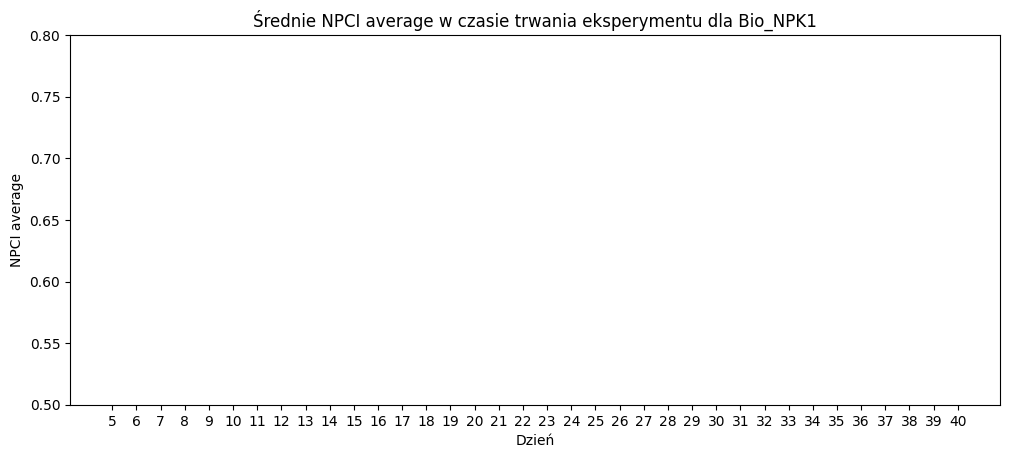

In [22]:
import matplotlib.pyplot as plt

fig33 = plt.figure(figsize=plt.figaspect(0.4))
ax33 = fig33.add_subplot(111)
ax33.errorbar(dzień_roślina_SD.index, dzień_roślina_SD['Średnia'], yerr=dzień_roślina_SD['SD'],
           color= 'lightblue',
           marker= 'x',
           markersize=2,
           linestyle='solid',
           linewidth=1,
           capsize=2,
           capthick=1)
ax33.set_title(f'Średnie NPCI average w czasie trwania eksperymentu dla Bio_NPK1')
ax33.set_xlabel('Dzień')
ax33.set_ylabel('NPCI average')
ax33.set_xticks(dzień_roślina_SD.index[::1])
ax33.set_ylim(0.5, 0.8)
plt.show()

In [ ]:



plt.savefig('C:/Users/zuzan/Desktop/magisterka/wykresy_python/srednie/NPCI_average_Bio_NPK1.png')
plt.show()


In [ ]:
## filtr dla danego treatment

kol=['unit', 'treatment', 'Day', 'Time', 'Digital biomass [mm³]', 'greenness average', 'Height [mm]', 'Leaf angle [°]', 
     'Leaf area [mm²]', 'Leaf area (projected) [mm²]', 'NDVI average', 'NPCI average', 'PSRI average']

pA2= tab_cal[kol]

pA2 = pA2.loc[(pA2["Day"] > 4)]

pA2.insert(loc=2, column="godz", value=pA2.groupby('Day').cumcount()+1)

pA2 = pA2.loc[(pA2["godz"] < 6)]

warunki=[]
for i in range(len(tab_cal)): 
    warunki.append(tab_cal.iloc[i,4])
warunkilista=list(set(warunki))

pA2treatment_dict={}
for i in warunkilista:
    pA2treatment_dict[i] = pA2[pA2['treatment'] == i]

for unit, df in pA2treatment_dict.items():
    print(f"Unit: {unit}")
    print(df)
